In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import seaborn as sns

In [16]:
path = r"..\News_Category_Dataset_v3.json"

df = pd.read_json(path,lines= True )
df = df[['headline', 'category']]
df.dropna(inplace=True)
df = df[df['category'] != '']
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


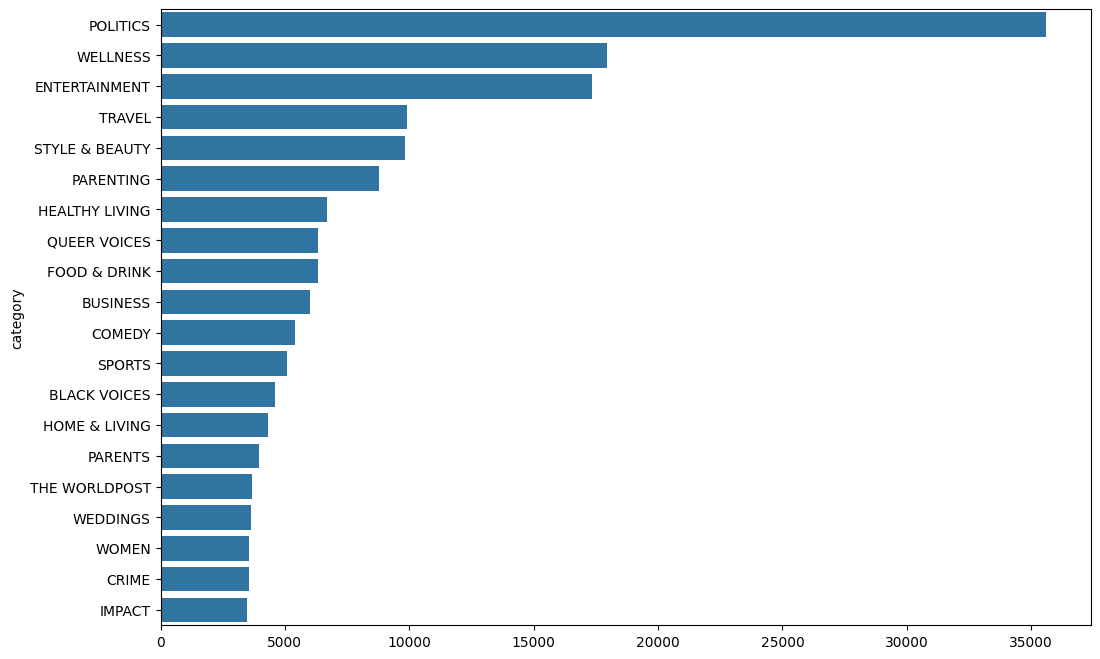

In [17]:
plt.figure(figsize= (12,8))
top = df['category'].value_counts().nlargest(20)
sns.barplot(y=top.index, x= top.values)
plt.show()

In [18]:
label_encoder= LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])
num_classes = len(label_encoder.classes_)
df.head()

,headline,category,label
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,35
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,35
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,5
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,22
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,35


In [19]:
max_length = 25
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['headline'])
sequences = tokenizer.texts_to_sequences(df['headline'])
word_index = tokenizer.word_index

In [20]:
x = pad_sequences(sequences, maxlen=max_length)
y = tf.keras.utils.to_categorical(df['label'], num_classes=num_classes)
print(x)

[[   0    0    0 ...    6 3684 1001]
 [   0    0    0 ... 5649    9   25]
 [   0    0    0 ... 7116  970 1820]
 ...
 [   0    0    0 ...   53   70  849]
 [   0    0    0 ... 4889    6 6494]
 [   0    0    0 ... 1558  519    2]]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size= 0.2, random_state= 42)

In [22]:
model = Sequential()
model.add(Embedding(input_dim= 10000, output_dim= 100, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\javier\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3134 - loss: 2.6891 - val_accuracy: 0.4410 - val_loss: 2.1654
Epoch 2/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.4767 - loss: 2.0292 - val_accuracy: 0.5063 - val_loss: 1.8840
Epoch 3/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.5242 - loss: 1.8043 - val_accuracy: 0.5257 - val_loss: 1.8028
Epoch 4/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.5504 - loss: 1.6816 - val_accuracy: 0.5376 - val_loss: 1.7546
Epoch 5/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.5681 - loss: 1.5957 - val_accuracy: 0.5392 - val_loss: 1.7334
Epoch 6/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.5846 - loss: 1.5289 - val_accuracy: 0.5426 - val_loss: 1.7416
Epoch 7/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.5976 - loss: 1.4691 - val_accuracy: 0.5452 - val_loss: 1.7391
Epoch 8/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()